# Project 1 - Ning Yu's Copy

#### Applying libraries necessary

In [1]:
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



#### Importing dataset into workbook

In [2]:
setwd("C:\\Users\\ningy\\Desktop\\Dropbox\\NUS_Modules\\DSC5101\\HW1")
data = read.csv("Project1Data.csv")

In [3]:
head(data)

maand,year,month,qu,cprice,tprice,oprice,incom,q1,q2,q3,q4,bprice,wprice
Jan 1990,1990,1,0.55,12.12,18.6,1,1640.87,1,0,0,0,3.47,28.15
Feb 1990,1990,2,0.65,12.12,18.6,1,1538.60,1,0,0,0,3.40,28.15
Mar 1990,1990,3,0.66,12.12,18.6,1,1680.93,1,0,0,0,3.26,28.33
Apr 1990,1990,4,0.66,12.12,18.6,1,1656.20,0,1,0,0,3.46,28.49
May 1990,1990,5,0.64,12.12,18.6,1,1700.80,0,1,0,0,3.47,28.55
Jun 1990,1990,6,0.65,12.12,18.6,1,1732.67,0,1,0,0,3.68,28.55


#### Using continuous variables for month/year

In [4]:
data$year <- as.factor(data$year)
data$month <- as.factor(data$month)

In [5]:
summary(data)

      maand      year        month          qu             cprice     
 Apr 1990: 1   1990:12   1      : 7   Min.   :0.5200   Min.   :12.00  
 Apr 1991: 1   1991:12   2      : 7   1st Qu.:0.6300   1st Qu.:12.12  
 Apr 1992: 1   1992:12   3      : 7   Median :0.6600   Median :12.12  
 Apr 1993: 1   1993:12   4      : 7   Mean   :0.6815   Mean   :14.03  
 Apr 1994: 1   1994:12   5      : 7   3rd Qu.:0.7400   3rd Qu.:15.66  
 Apr 1995: 1   1995:12   6      : 7   Max.   :1.0400   Max.   :20.00  
 (Other) :78   1996:12   (Other):42                                   
     tprice          oprice          incom            q1             q2      
 Min.   :18.41   Min.   :1.000   Min.   :1539   Min.   :0.00   Min.   :0.00  
 1st Qu.:18.60   1st Qu.:1.050   1st Qu.:1807   1st Qu.:0.00   1st Qu.:0.00  
 Median :19.16   Median :1.090   Median :1954   Median :0.00   Median :0.00  
 Mean   :19.19   Mean   :1.089   Mean   :1957   Mean   :0.25   Mean   :0.25  
 3rd Qu.:19.72   3rd Qu.:1.140   3rd Qu.:2

In [6]:
data_numeric <- select(data,qu, cprice, tprice, oprice, incom, q1, q2, q3, q4, bprice, wprice)
data_q1 <- filter(data, data$q1==1)
data_q2 <- filter(data, data$q2==1)
data_q3 <- filter(data, data$q3==1)
data_q4 <- filter(data, data$q4==1)

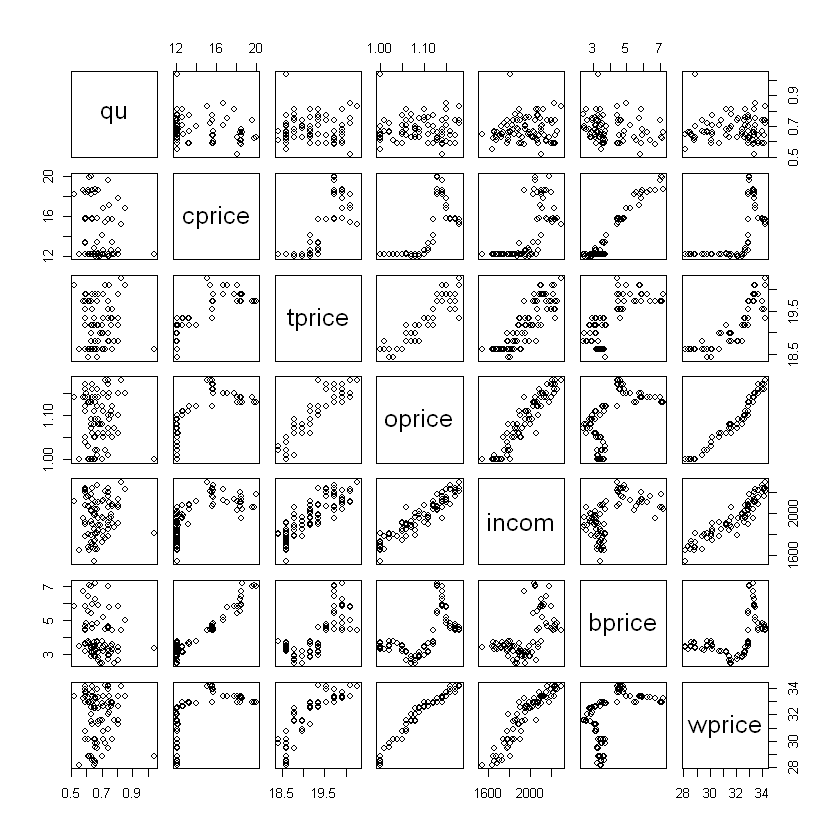

In [7]:
data_pairs = select(data,qu, cprice, tprice, oprice, incom, bprice, wprice)
pairs(data_pairs, labels=colnames(data_pairs))

It seems like there are some non-linear factors w.r.t. quantity and price: most factors are exponential w.r.t. cprice, except bprice. We can barely observe any real trends on qu.

 <br><br><br><br><br><br>
 ### Attempting a one-stage linear regression first

In [8]:
supply_1 <- lm(data$qu ~ data$bprice + data$wprice)
supply_seasonal_1 <- lm(data$qu ~ data$bprice + data$wprice + data$q1 + data$q2 + data$q3)
summary(supply_seasonal_1)


Call:
lm(formula = data$qu ~ data$bprice + data$wprice + data$q1 + 
    data$q2 + data$q3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.116098 -0.048325 -0.008104  0.042402  0.303985 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.601553   0.144749   4.156 8.24e-05 ***
data$bprice -0.019626   0.007316  -2.683 0.008912 ** 
data$wprice  0.006917   0.004912   1.408 0.163032    
data$q1     -0.089327   0.021853  -4.088 0.000105 ***
data$q2     -0.068694   0.021814  -3.149 0.002322 ** 
data$q3     -0.085208   0.021754  -3.917 0.000191 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07045 on 78 degrees of freedom
Multiple R-squared:  0.2644,	Adjusted R-squared:  0.2173 
F-statistic: 5.608 on 5 and 78 DF,  p-value: 0.0001819


In [9]:
demand_1 <- lm(data$qu ~ data$cprice + data$tprice + data$oprice + data$incom)
demand_seasonal_1 <- lm(data$qu ~ data$cprice + data$tprice + data$oprice + data$incom + data$q1 + data$q2 + data$q3)
summary(demand_seasonal_1)


Call:
lm(formula = data$qu ~ data$cprice + data$tprice + data$oprice + 
    data$incom + data$q1 + data$q2 + data$q3)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.131410 -0.048288 -0.006498  0.035609  0.284310 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0330389  0.5652907   0.058  0.95355   
data$cprice -0.0161481  0.0055404  -2.915  0.00468 **
data$tprice  0.0635931  0.0428854   1.483  0.14225   
data$oprice -0.6053566  0.5197137  -1.165  0.24775   
data$incom   0.0001886  0.0001392   1.355  0.17947   
data$q1     -0.0791262  0.0231699  -3.415  0.00103 **
data$q2     -0.0684076  0.0216972  -3.153  0.00232 **
data$q3     -0.0731116  0.0224155  -3.262  0.00166 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06993 on 76 degrees of freedom
Multiple R-squared:  0.2939,	Adjusted R-squared:  0.2288 
F-statistic: 4.518 on 7 and 76 DF,  p-value: 0.0002967


In [10]:
log_demand <- lm(log(data$qu) ~ log(data$cprice) + log(data$tprice) + log(data$oprice) + log(data$incom) + data$q1 + data$q2 + data$q3)
log_demand_seasonal <- lm(log(data$qu) ~ log(data$cprice) + log(data$tprice) + log(data$oprice) + log(data$incom))

summary(log_demand_seasonal)


Call:
lm(formula = log(data$qu) ~ log(data$cprice) + log(data$tprice) + 
    log(data$oprice) + log(data$incom))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25153 -0.05540 -0.00518  0.06717  0.38679 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -11.3062     4.3927  -2.574  0.01193 * 
log(data$cprice)  -0.3689     0.1306  -2.824  0.00599 **
log(data$tprice)   1.8487     1.2515   1.477  0.14360   
log(data$oprice)  -1.3778     0.7962  -1.731  0.08745 . 
log(data$incom)    0.8633     0.3644   2.369  0.02027 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1056 on 79 degrees of freedom
Multiple R-squared:  0.1485,	Adjusted R-squared:  0.1054 
F-statistic: 3.443 on 4 and 79 DF,  p-value: 0.01201


 <br><br><br><br><br><br>
### Trying a two-stage least squares model

#### Stage 1: Modelling price using instrumental and control variables
In this case, we identify instrumental variables as supply variables: wprice, bprice  
And control variables as demand variables: incom, tprice, oprice

First, we can do a simply collinearity check for these varibles we want to use.

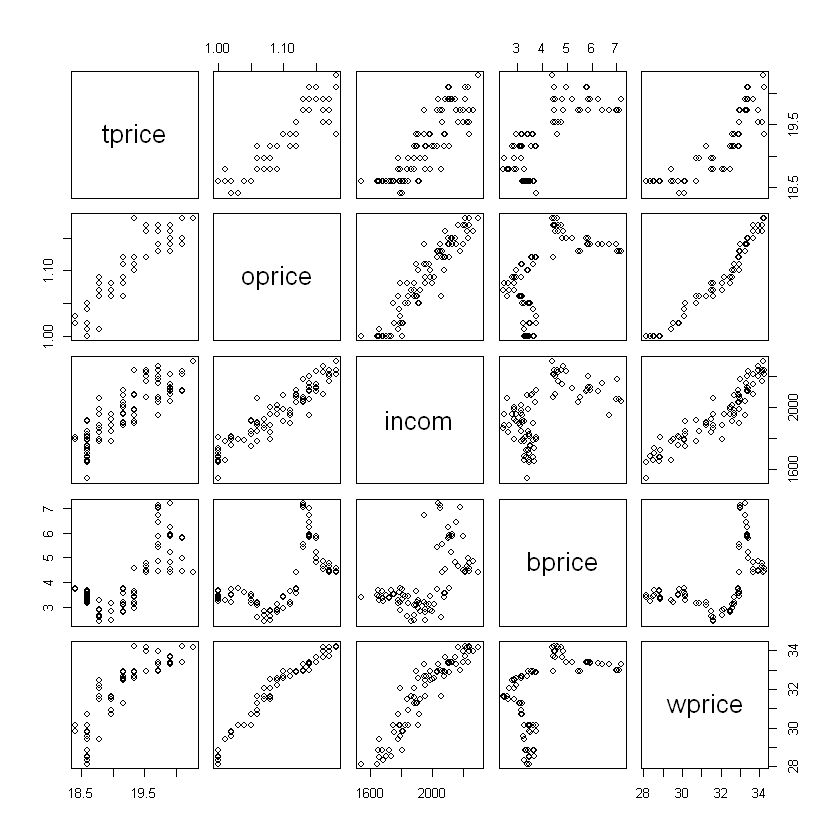

In [11]:
pairs(select(data, tprice, oprice, incom, bprice, wprice))

From the above visualization, we can see that wprice, income and oprice are highly collinear. We can use just one of those.

Trying some other combinations now, it seems like removing the control variables give the clearest prediction here.

In [12]:
stage1_model = lm(cprice~bprice+wprice, data=data)
summary(stage1_model)


Call:
lm(formula = cprice ~ bprice + wprice, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36188 -0.27115 -0.04414  0.22895  1.37562 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.09712    0.97345  -3.182  0.00208 ** 
bprice       1.75381    0.04969  35.295  < 2e-16 ***
wprice       0.31640    0.03332   9.497  8.3e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4796 on 81 degrees of freedom
Multiple R-squared:  0.9656,	Adjusted R-squared:  0.9648 
F-statistic:  1138 on 2 and 81 DF,  p-value: < 2.2e-16


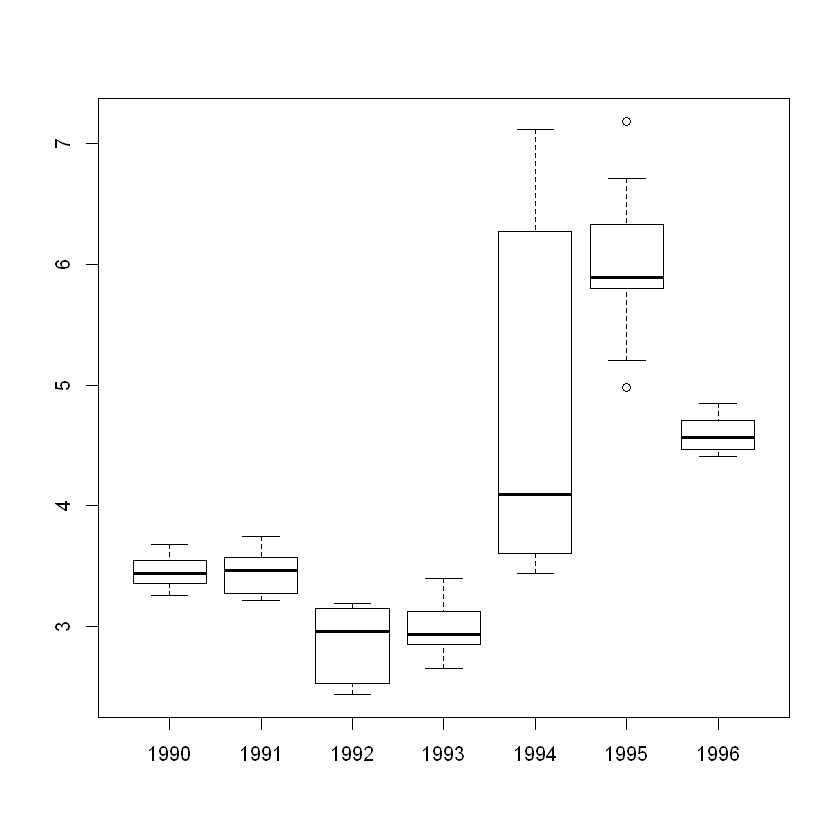

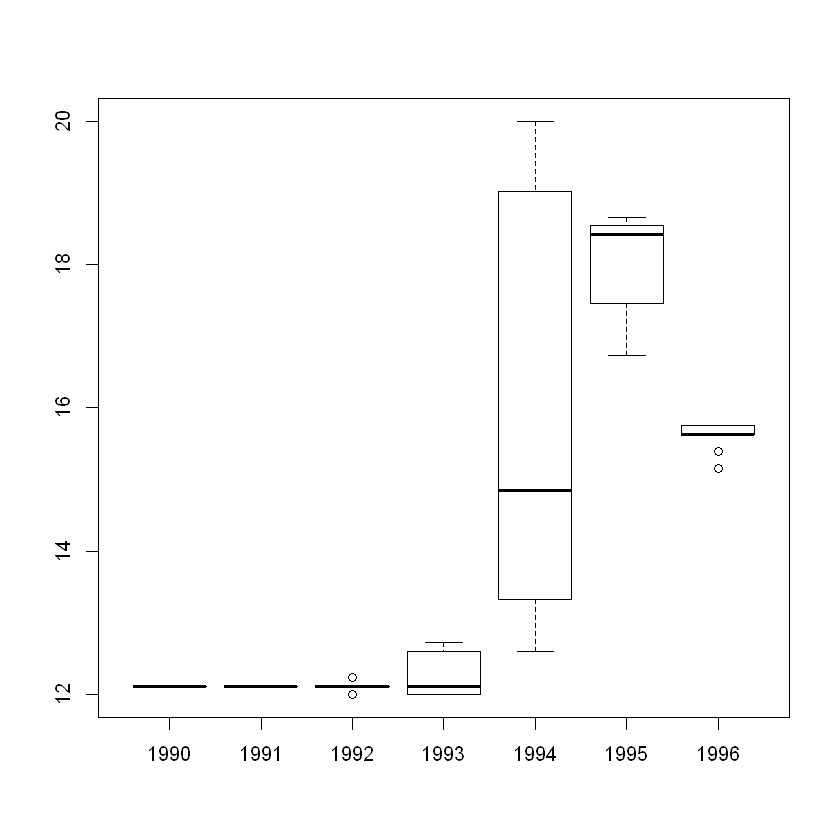

In [13]:
plot(data$year, data$bprice)
plot(data$year, data$cprice)


Although we might want to consider more powerful predictive techniques, an R-square of .97 is decent for now, we can now bring this model to the second stage, where I suspect we will need more effort, judging by the weak correlation between qu and cprice.  <br><br>
### Stage 2: determining demand: quantity based on price
As previously mentioned, our determinants of demand include incom, tprice and oprice. We will give these variables a try now

In [14]:
data$cprice_pred = predict(stage1_model)
stage2_model_demand = lm(qu~incom+tprice+oprice+cprice_pred, data=data)
summary(stage2_model_demand)


Call:
lm(formula = qu ~ incom + tprice + oprice + cprice_pred, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16035 -0.04300 -0.00607  0.05117  0.32415 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0780830  0.5915955   0.132  0.89533   
incom        0.0003208  0.0001357   2.365  0.02049 * 
tprice       0.0649294  0.0447417   1.451  0.15068   
oprice      -0.9566443  0.5259112  -1.819  0.07270 . 
cprice_pred -0.0162952  0.0059546  -2.737  0.00767 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07547 on 79 degrees of freedom
Multiple R-squared:  0.145,	Adjusted R-squared:  0.1017 
F-statistic:  3.35 on 4 and 79 DF,  p-value: 0.01382


This model apparently sucks, so I'll try add a multiplicative model instead

In [15]:
data$ln_qu = log(data$qu)
data$ln_incom = log(data$incom)
data$ln_tprice = log(data$tprice)
data$ln_oprice = log(data$oprice)
data$ln_cprice_pred = log(data$cprice_pred)
stage2_model_demand_ln = lm(ln_qu~ln_incom+ln_tprice+ln_oprice+ln_cprice_pred, data=data)
summary(stage2_model_demand_ln)


Call:
lm(formula = ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25777 -0.05547 -0.01227  0.07175  0.38018 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -10.8452     4.2807  -2.533  0.01327 * 
ln_incom         0.8554     0.3630   2.357  0.02091 * 
ln_tprice        1.7172     1.2029   1.428  0.15736   
ln_oprice       -1.2890     0.7921  -1.627  0.10765   
ln_cprice_pred  -0.3764     0.1278  -2.946  0.00422 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1052 on 79 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1125 
F-statistic: 3.631 on 4 and 79 DF,  p-value: 0.00908


Adding in seasonality to try...

In [16]:
stage2_model_demand_ln = lm(ln_qu~ln_incom+ln_tprice+ln_oprice+ln_cprice_pred+q1+q2+q3, data=data)
summary(stage2_model_demand_ln)


Call:
lm(formula = ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + 
    q1 + q2 + q3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22080 -0.05926 -0.01079  0.04936  0.32701 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -6.92669    4.20387  -1.648  0.10354   
ln_incom        0.44508    0.37477   1.188  0.23869   
ln_tprice       1.43219    1.12382   1.274  0.20641   
ln_oprice      -0.59079    0.78537  -0.752  0.45423   
ln_cprice_pred -0.35815    0.11903  -3.009  0.00356 **
q1             -0.10932    0.03250  -3.364  0.00121 **
q2             -0.08684    0.03033  -2.863  0.00542 **
q3             -0.10384    0.03140  -3.307  0.00144 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09782 on 76 degrees of freedom
Multiple R-squared:  0.2973,	Adjusted R-squared:  0.2326 
F-statistic: 4.594 on 7 and 76 DF,  p-value: 0.0002527


### Fine tuning seasonality components

Suspecting there could be variables that can be better fine tuned, so we can try doing some visualizations.

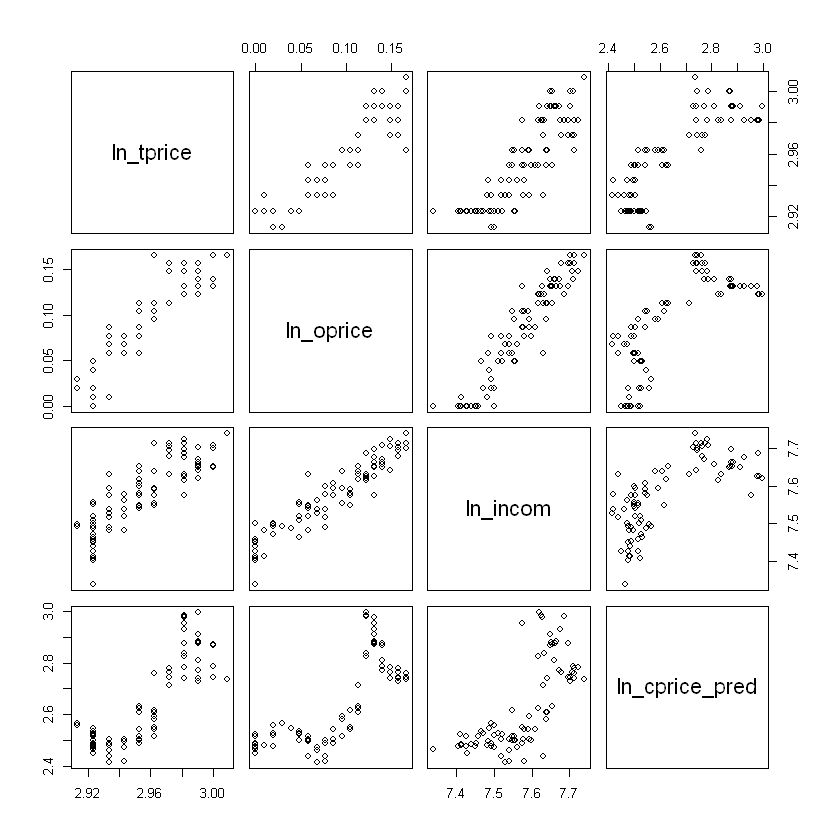

In [17]:
pairs(select(data, ln_tprice, ln_oprice, ln_incom, ln_cprice_pred))

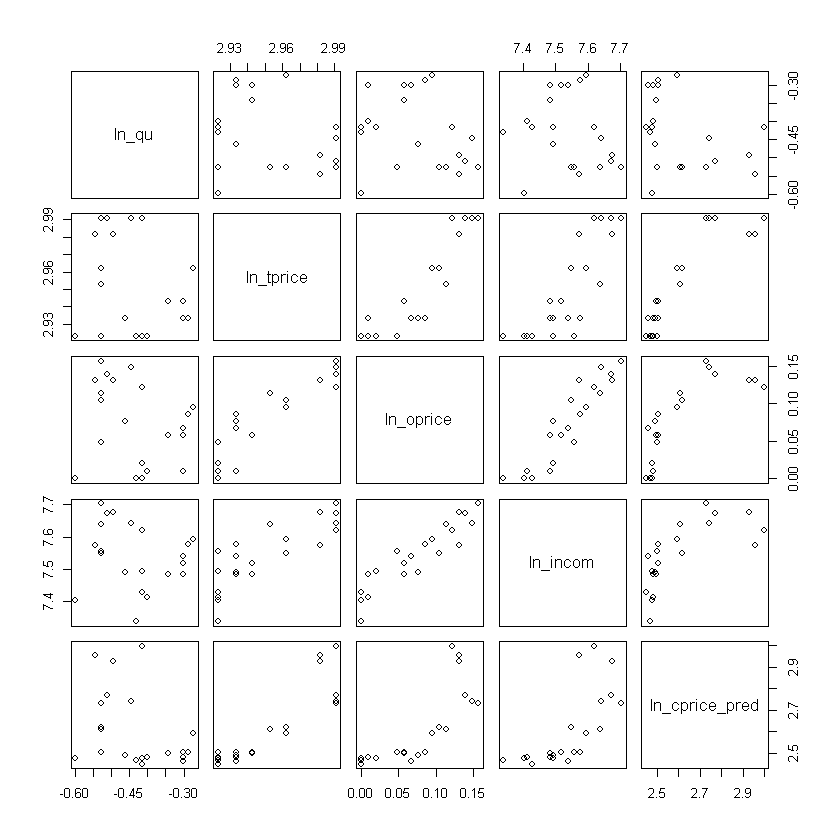

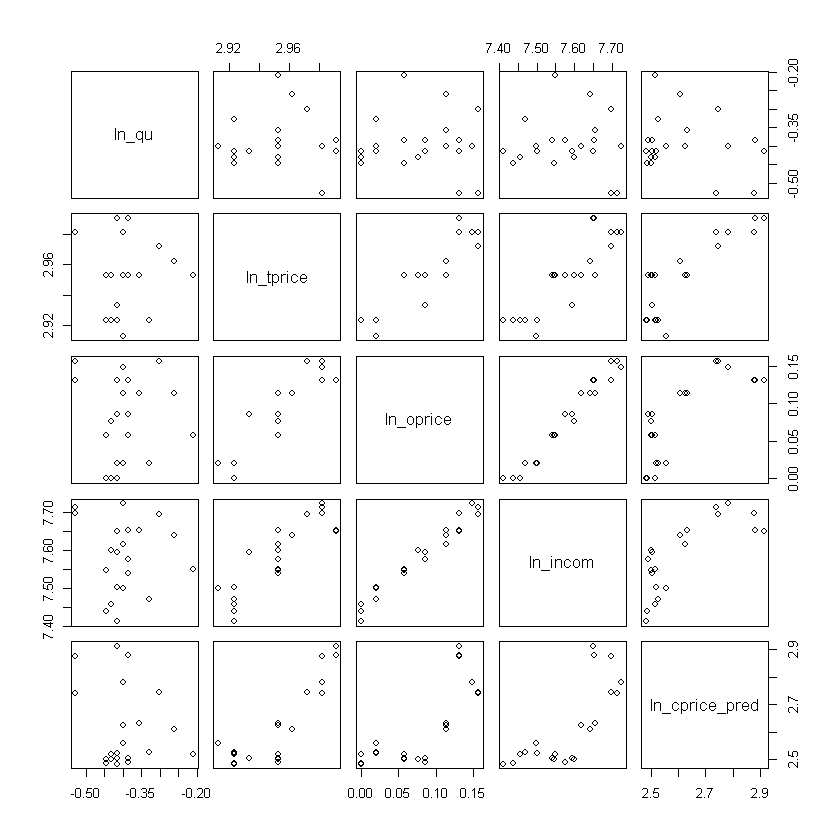

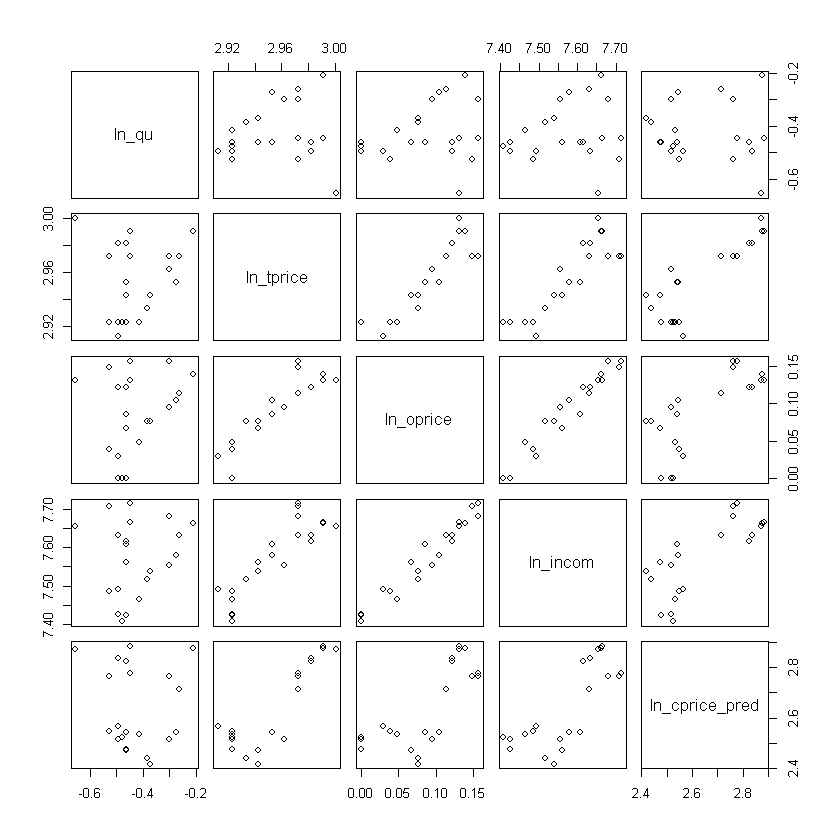

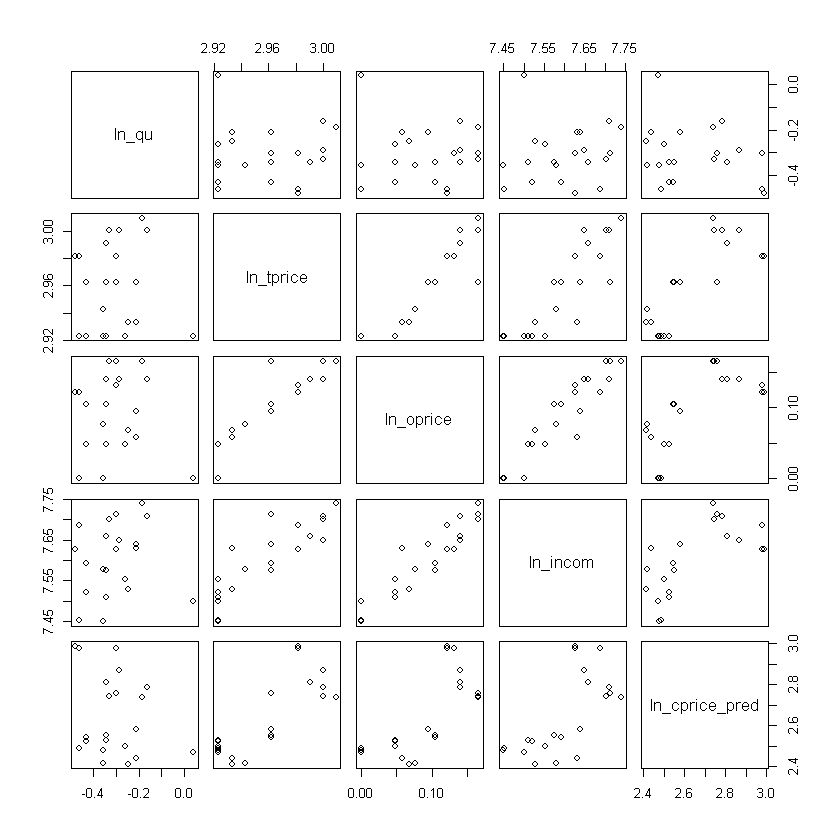

In [18]:
data_q1 = data[data$q1==1,]
pairs(select(data_q1, ln_qu, ln_tprice, ln_oprice, ln_incom, ln_cprice_pred))

data_q2 = data[data$q2==1,]
pairs(select(data_q2, ln_qu, ln_tprice, ln_oprice, ln_incom, ln_cprice_pred))

data_q3 = data[data$q3==1,]
pairs(select(data_q3, ln_qu, ln_tprice, ln_oprice, ln_incom, ln_cprice_pred))

data_q4 = data[data$q4==1,]
pairs(select(data_q4, ln_qu, ln_tprice, ln_oprice, ln_incom, ln_cprice_pred))

Just gonna plug in all the variables and try my luck... :(

In [19]:
stage2_model_demand_ln_seasonal = lm(ln_qu~ln_incom+ln_tprice+ln_oprice+ln_cprice_pred+q1+q2+q3
                            +q1*ln_incom+q2*ln_incom+q3*ln_incom
                            +q1*ln_tprice+q2*ln_tprice+q3*ln_tprice
                            +q1*ln_oprice+q2*ln_oprice+q3*ln_oprice
                            +q1*ln_cprice_pred+q2*ln_cprice_pred+q3*ln_cprice_pred
                            , data=data)
summary(stage2_model_demand_ln_seasonal)


Call:
lm(formula = ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + 
    q1 + q2 + q3 + q1 * ln_incom + q2 * ln_incom + q3 * ln_incom + 
    q1 * ln_tprice + q2 * ln_tprice + q3 * ln_tprice + q1 * ln_oprice + 
    q2 * ln_oprice + q3 * ln_oprice + q1 * ln_cprice_pred + q2 * 
    ln_cprice_pred + q3 * ln_cprice_pred, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.208984 -0.053173 -0.002315  0.043237  0.269103 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)       -18.78629    6.89991  -2.723  0.00833 **
ln_incom            1.70685    0.69316   2.462  0.01650 * 
ln_tprice           2.23753    1.93693   1.155  0.25231   
ln_oprice          -2.99680    1.32718  -2.258  0.02736 * 
ln_cprice_pred     -0.31756    0.18701  -1.698  0.09435 . 
q1                 11.35784   11.46465   0.991  0.32557   
q2                 25.33637   14.22371   1.781  0.07961 . 
q3                 30.28552   12.28016   2.466  0.01634 

10% increase - we can do better by adding in polynomial variables first

In [20]:
data$ln_incom_sq = data$ln_incom^2
data$ln_tprice_sq = data$ln_tprice^2
data$ln_oprice_sq = data$ln_oprice^2
data$ln_cprice_pred_sq = data$ln_cprice_pred^2
stage2_model_demand_ln_poly = lm(ln_qu~ln_incom+ln_tprice+ln_oprice+ln_cprice_pred+q1+q2+q3
                            +q1*ln_incom+q2*ln_incom+q3*ln_incom
                            +q1*ln_tprice+q2*ln_tprice+q3*ln_tprice
                            +q1*ln_oprice+q2*ln_oprice+q3*ln_oprice
                            +q1*ln_cprice_pred+q2*ln_cprice_pred+q3*ln_cprice_pred
                            +ln_incom_sq+ln_tprice_sq+ln_oprice_sq+ln_cprice_pred_sq
                            , data=data)
summary(stage2_model_demand_ln_poly)


Call:
lm(formula = ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + 
    q1 + q2 + q3 + q1 * ln_incom + q2 * ln_incom + q3 * ln_incom + 
    q1 * ln_tprice + q2 * ln_tprice + q3 * ln_tprice + q1 * ln_oprice + 
    q2 * ln_oprice + q3 * ln_oprice + q1 * ln_cprice_pred + q2 * 
    ln_cprice_pred + q3 * ln_cprice_pred + ln_incom_sq + ln_tprice_sq + 
    ln_oprice_sq + ln_cprice_pred_sq, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18746 -0.05223 -0.00954  0.05017  0.22269 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)       -458.27634  279.14522  -1.642  0.10588   
ln_incom            71.43408   35.85470   1.992  0.05089 . 
ln_tprice          118.70434  166.57431   0.713  0.47884   
ln_oprice           -5.38998    1.99990  -2.695  0.00911 **
ln_cprice_pred       0.75342    4.13829   0.182  0.85615   
q1                  18.37619   12.10954   1.517  0.13439   
q2                  29.19406   14.94058   1.954  

In [21]:
stage2_model_demand_ln_poly_step = step(lm(ln_qu~ln_incom+ln_tprice+ln_oprice+ln_cprice_pred+q1+q2+q3
                            +q1*ln_incom+q2*ln_incom+q3*ln_incom
                            +q1*ln_tprice+q2*ln_tprice+q3*ln_tprice
                            +q1*ln_oprice+q2*ln_oprice+q3*ln_oprice
                            +q1*ln_cprice_pred+q2*ln_cprice_pred+q3*ln_cprice_pred
                            +ln_incom_sq+ln_tprice_sq+ln_oprice_sq+ln_cprice_pred_sq
                            , data=data))

Start:  AIC=-371.63
ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + q1 + 
    q2 + q3 + q1 * ln_incom + q2 * ln_incom + q3 * ln_incom + 
    q1 * ln_tprice + q2 * ln_tprice + q3 * ln_tprice + q1 * ln_oprice + 
    q2 * ln_oprice + q3 * ln_oprice + q1 * ln_cprice_pred + q2 * 
    ln_cprice_pred + q3 * ln_cprice_pred + ln_incom_sq + ln_tprice_sq + 
    ln_oprice_sq + ln_cprice_pred_sq

                    Df Sum of Sq     RSS     AIC
- ln_cprice_pred:q1  1  0.000009 0.56847 -373.63
- ln_tprice:q1       1  0.000415 0.56887 -373.57
- ln_cprice_pred_sq  1  0.000678 0.56914 -373.53
- ln_cprice_pred:q3  1  0.001127 0.56959 -373.47
- ln_cprice_pred:q2  1  0.003832 0.57229 -373.07
- ln_tprice_sq       1  0.004632 0.57309 -372.95
- ln_tprice:q2       1  0.006905 0.57537 -372.62
- ln_tprice:q3       1  0.007760 0.57622 -372.49
<none>                           0.56846 -371.63
- ln_oprice_sq       1  0.015029 0.58349 -371.44
- ln_oprice:q1       1  0.017204 0.58566 -371.13
- ln_oprice:q

In [22]:
summary(stage2_model_demand_ln_poly_step)


Call:
lm(formula = ln_qu ~ ln_incom + ln_oprice + ln_cprice_pred + 
    q1 + q2 + q3 + ln_incom_sq + ln_oprice_sq + ln_incom:q1 + 
    ln_incom:q2 + ln_incom:q3 + ln_oprice:q1 + ln_oprice:q2 + 
    ln_oprice:q3, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.214018 -0.050774 -0.007942  0.055099  0.235928 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)    -283.0575   129.0045  -2.194  0.03159 * 
ln_incom         72.8204    33.9477   2.145  0.03547 * 
ln_oprice        -4.5121     1.6742  -2.695  0.00883 **
ln_cprice_pred   -0.2447     0.1002  -2.441  0.01721 * 
q1               17.1747     6.9334   2.477  0.01570 * 
q2               21.1731    10.1621   2.084  0.04091 * 
q3               27.7618     8.7277   3.181  0.00220 **
ln_incom_sq      -4.6700     2.2330  -2.091  0.04018 * 
ln_oprice_sq     12.9765     8.0347   1.615  0.11086   
ln_incom:q1      -2.3075     0.9300  -2.481  0.01554 * 
ln_incom:q2      -2.8485     

In [28]:
stage2_model_demand_ln_poly_inf = (lm(ln_qu~ln_incom+ln_tprice+ln_oprice+ln_cprice_pred+q1+q2+q3
                            +q1*ln_incom+q2*ln_incom+q3*ln_incom
                            +q1*ln_tprice+q2*ln_tprice+q3*ln_tprice
                            +q1*ln_oprice+q2*ln_oprice+q3*ln_oprice
                            +q1*ln_cprice_pred+q2*ln_cprice_pred+q3*ln_cprice_pred
                            +ln_incom_sq+ln_tprice_sq+ln_oprice_sq+ln_cprice_pred_sq
                            +oprice*ln_incom+oprice*ln_tprice+oprice*cprice_pred
                            +q1*ln_incom_sq+q2*ln_incom_sq+q3*ln_incom_sq
                            +q1*ln_tprice_sq+q2*ln_tprice_sq+q3*ln_tprice_sq
                            +q1*ln_oprice_sq+q2*ln_oprice_sq+q3*ln_oprice_sq
                            +q1*ln_cprice_pred_sq+q2*ln_cprice_pred_sq+q3*ln_cprice_pred_sq
                            , data=data))
summary(stage2_model_demand_ln_poly_inf)


Call:
lm(formula = ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + 
    q1 + q2 + q3 + q1 * ln_incom + q2 * ln_incom + q3 * ln_incom + 
    q1 * ln_tprice + q2 * ln_tprice + q3 * ln_tprice + q1 * ln_oprice + 
    q2 * ln_oprice + q3 * ln_oprice + q1 * ln_cprice_pred + q2 * 
    ln_cprice_pred + q3 * ln_cprice_pred + ln_incom_sq + ln_tprice_sq + 
    ln_oprice_sq + ln_cprice_pred_sq + oprice * ln_incom + oprice * 
    ln_tprice + oprice * cprice_pred + q1 * ln_incom_sq + q2 * 
    ln_incom_sq + q3 * ln_incom_sq + q1 * ln_tprice_sq + q2 * 
    ln_tprice_sq + q3 * ln_tprice_sq + q1 * ln_oprice_sq + q2 * 
    ln_oprice_sq + q3 * ln_oprice_sq + q1 * ln_cprice_pred_sq + 
    q2 * ln_cprice_pred_sq + q3 * ln_cprice_pred_sq, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11922 -0.04211 -0.01204  0.04489  0.17815 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)           1632.9740  1532.7103   1.065   0.2926  
ln_i

In [29]:
stage2_model_demand_ln_poly_step_inf = step(stage2_model_demand_ln_poly_inf)

Start:  AIC=-375.04
ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + q1 + 
    q2 + q3 + q1 * ln_incom + q2 * ln_incom + q3 * ln_incom + 
    q1 * ln_tprice + q2 * ln_tprice + q3 * ln_tprice + q1 * ln_oprice + 
    q2 * ln_oprice + q3 * ln_oprice + q1 * ln_cprice_pred + q2 * 
    ln_cprice_pred + q3 * ln_cprice_pred + ln_incom_sq + ln_tprice_sq + 
    ln_oprice_sq + ln_cprice_pred_sq + oprice * ln_incom + oprice * 
    ln_tprice + oprice * cprice_pred + q1 * ln_incom_sq + q2 * 
    ln_incom_sq + q3 * ln_incom_sq + q1 * ln_tprice_sq + q2 * 
    ln_tprice_sq + q3 * ln_tprice_sq + q1 * ln_oprice_sq + q2 * 
    ln_oprice_sq + q3 * ln_oprice_sq + q1 * ln_cprice_pred_sq + 
    q2 * ln_cprice_pred_sq + q3 * ln_cprice_pred_sq

                       Df Sum of Sq     RSS     AIC
- q3:ln_oprice_sq       1  0.000000 0.36419 -377.04
- ln_incom:q3           1  0.000285 0.36447 -376.97
- q3:ln_incom_sq        1  0.000391 0.36458 -376.95
- q2:ln_tprice_sq       1  0.000417 0.36460 -376.94


In [30]:
summary(stage2_model_demand_ln_poly_step_inf)


Call:
lm(formula = ln_qu ~ ln_incom + ln_tprice + ln_oprice + ln_cprice_pred + 
    q1 + q2 + q3 + ln_incom_sq + ln_tprice_sq + ln_oprice_sq + 
    ln_cprice_pred_sq + oprice + cprice_pred + ln_incom:q1 + 
    ln_incom:q2 + ln_tprice:q1 + ln_tprice:q3 + ln_oprice:q1 + 
    ln_oprice:q2 + ln_oprice:q3 + ln_cprice_pred:q1 + ln_cprice_pred:q2 + 
    ln_cprice_pred:q3 + oprice:cprice_pred + q1:ln_incom_sq + 
    q3:ln_incom_sq + q3:ln_tprice_sq + q1:ln_oprice_sq + q2:ln_oprice_sq + 
    q1:ln_cprice_pred_sq + q2:ln_cprice_pred_sq, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.12047 -0.04477 -0.00914  0.03954  0.18381 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           1.285e+03  1.041e+03   1.235 0.222394    
ln_incom              1.292e+02  4.924e+01   2.624 0.011379 *  
ln_tprice            -1.575e+02  1.839e+02  -0.856 0.395814    
ln_oprice             1.638e+03  9.265e+02   1.768 0.082922 .  
ln_cprice_pred

In [44]:
test = lm(formula = ln_qu ~ ln_incom + ln_oprice + ln_cprice_pred + 
    q1 + q3 + ln_incom_sq + ln_oprice_sq + 
    ln_cprice_pred_sq + oprice + ln_incom:q1 + 
    ln_incom:q2 + ln_tprice:q1 + ln_oprice:q1 + 
    ln_oprice:q2 + ln_oprice:q3 + ln_cprice_pred:q1 + ln_cprice_pred:q2 +
    oprice:cprice_pred + q1:ln_incom_sq + 
    q3:ln_incom_sq+ q1:ln_oprice_sq +
    q1:ln_cprice_pred_sq + q2:ln_cprice_pred_sq, data = data)
summary(test)


Call:
lm(formula = ln_qu ~ ln_incom + ln_oprice + ln_cprice_pred + 
    q1 + q3 + ln_incom_sq + ln_oprice_sq + ln_cprice_pred_sq + 
    oprice + ln_incom:q1 + ln_incom:q2 + ln_tprice:q1 + ln_oprice:q1 + 
    ln_oprice:q2 + ln_oprice:q3 + ln_cprice_pred:q1 + ln_cprice_pred:q2 + 
    oprice:cprice_pred + q1:ln_incom_sq + q3:ln_incom_sq + q1:ln_oprice_sq + 
    q1:ln_cprice_pred_sq + q2:ln_cprice_pred_sq, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.215373 -0.044803 -0.005856  0.036298  0.185964 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           9.420e+02  6.993e+02   1.347 0.183034    
ln_incom              1.286e+02  4.619e+01   2.783 0.007182 ** 
ln_oprice             1.488e+03  7.000e+02   2.126 0.037651 *  
ln_cprice_pred        7.281e+01  2.595e+01   2.806 0.006754 ** 
q1                    5.554e+02  2.390e+02   2.324 0.023533 *  
q3                    1.507e+01  3.898e+00   3.865 0.000275 ***
ln_

### Starting to model for inflation: using a new set of inflation-based variables

To do inflation, we will be using an inflation factor to deflate our price indexes, before using them to train quantity.

### Running the Durbin-Wu-Hausman test: IVs should be independent of residuals of stage 2 model

In [45]:
data$residuals_stage2 = residuals(test)
hausman = lm(residuals_stage2~bprice+wprice, data=data)  

In [46]:
summary(hausman)


Call:
lm(formula = residuals_stage2 ~ bprice + wprice, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.215167 -0.045420 -0.005625  0.034633  0.185292 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0247335  0.1474479  -0.168    0.867
bprice      -0.0009078  0.0075264  -0.121    0.904
wprice       0.0008931  0.0050466   0.177    0.860

Residual standard error: 0.07265 on 81 degrees of freedom
Multiple R-squared:  0.0004015,	Adjusted R-squared:  -0.02428 
F-statistic: 0.01627 on 2 and 81 DF,  p-value: 0.9839
